# Project: Sentiment Analysis on Bengali Book Reviews

In this project we will classify the sentiment of a review either it is positive or negative. To do this, we have created a dataset of $1000$ bengali book reviews. In this dataset  $528$ reviews are annotated as Positive Sentiment and another $472$ reviews as negative sentiment. All the Reviews are collected from different online book shops and then manually annotated by two native bengali speaker.  
Here, Negative Reviews are labled as 0 and Positive reviews as 1.

**Project Includes:**

-   Preprocessing 
-   Exploratory Analysis
-   Feature Extraction using TF-IDF for N-gram
-   Machine Learning Model Development
-   Evaluation Measure 
-   Saved the Final Model
-   Model Deployment

## Import Libraries

In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
stopwords_list ='D:\\CSE 497\\Bengali-Book-Reviews-master\\Dataset and Notebook\\book_stopwords.txt'

## Importing the Dataset

In [425]:
# Read the data and take only 1000 Reviews
#data = pd.read_excel('D:\\CSE 497\\Bengali-Book-Reviews-master\\Dataset and Notebook\\bookReviews_2000.xlsx', 'rU', encoding='windows-1252')
#data = pd.read_excel('D:\\CSE 497\\Bengali-Book-Reviews-master\\Dataset and Notebook\\bookReviews_2000.xlsx', 'rU', encoding='iso-8859-1')
data = pd.read_excel('D:\\CSE 497\\Bengali-Book-Reviews-master\\Dataset and Notebook\\bookReviews_2000.xlsx', )#,encoding='iso-8859-1')

#data = pd.read_csv('D:\CSE 497\Bengali-Book-Reviews-master\Dataset and Notebook\bookReviews_2000.csv')
#data = pd.read_csv('D:\\CSE 497\Bengali-Book-Reviews-master\\Dataset and Notebook\\bookReviews_2000.csv')


In [426]:
data

,Unnamed: 0,Review,Sentiment
0,0.0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,0.0
1,1.0,ফালতু বই। শুধু শুধু টাকা নষ্ট।,0.0
2,2.0,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",0.0
3,3.0,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,0.0
4,4.0,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",0.0
...,...,...,...
2006,2006.0,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,0.0
2007,2007.0,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,0.0
2008,2008.0,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,0.0
2009,2009.0,বোগাস বই। টাকা নষ্ট।\n ...,0.0


In [427]:
del data['Unnamed: 0']

In [428]:
data.sample(10)

,Review,Sentiment
1380,অনেক জানার একটি বই।,1.0
711,ছোট ছোট গল্প দিয়ে যে জাপানকে এত সুন্দর করে উপস...,1.0
659,এটা খুব চমৎকার বই,1.0
929,বইটি মোটিভেশনাল প্লাস বাস্তববাদী বই হিসেবে আমা...,1.0
321,হতাশ হইলাম! গল্পের নামের সাথে অমিল বেশি চোখে পড়ে!,0.0
977,সত্যিই অসাধারণ!!! এই ধরনের কাজ প্রিয় লেখকের কা...,1.0
1027,হলিউড মুভির কল্যাণে 'সায়েন্স ফিকশন' শুনলেই চোখ...,1.0
963,অসাধারণ এবং আলাদা টাইপ এর বই ।,1.0
557,উপন্যাসটির শুরু এবং শেষটা ছিল এক কথায় অসাধারণ!...,1.0
1379,বরাবরের মতোই ভালো লেগেছে শাহরিয়ার সাহেবের এই বইটি,1.0


In [429]:
data.Sentiment = data.Sentiment.replace({1:'Positive',0:'Negative'})
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Sentiment =='Positive']),
      "\nTotal Negative Reviews:",len(data[data.Sentiment=='Negative']))

Total Reviews: 2011 
Total Positive Reviews: 982 
Total Negative Reviews: 1029


In [430]:
print(data.dtypes)

Review       object
Sentiment    object
dtype: object


In [431]:
data

,Review,Sentiment
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative
...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative


In [432]:
# print some unprocessed reviews
sample_data = [10,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print(data.Review[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')  

দয়া করে কোনো বাঙালি বইটি কিনবেন না। দেশকে ভালবাসলে ভাষাকে ভালবাসলে বইটিকে বর্জন করুন। 
 Sentiment:--  Negative 

অনুবাদ এর মান আরো ভালো করা উচিত ছিল।😔 
 Sentiment:--  Negative 

ফালতু লুতুপুতু প্রেমকাহিনী 
 Sentiment:--  Negative 

পড়তেই কষ্ট হয় 
 Sentiment:--  Negative 

শংকরের বিখ্যাত এই বইটা অবশেষে শেষ করলাম । বেশ দীর্ঘ সময় নিয়ে পড়ে শেষ করতে হয়েছে এটা । আমার কাছে মনে হয়েছে উপন্যাসের শুরুতে লেখক যেরকম আগ্রহ ধরে রাখতে পেরেছেন পরবর্তীতে আর তেমনটা পারেন নি। পুরো বই জুড়ে লেখক সেই একই শাহজাহান হোটেলের বর্ননা দিয়ে যাচ্ছেন তো যাচ্ছেন ই । মাঝে মাঝে মনে হয়েছে বইটা একটা আবাসিক শান শওকত ওয়ালা হোটেলে কর্মরত কোন এক কর্মচারীর ডায়রী। পুরো বইতে লেখক শাহজাহান হোটেলের নাম নিয়েই গেছেন অথচ এই "শাহজাহান" বানানটাই ইচ্ছে করে বার বার শাজাহান লেখেছেন, যেটা কলকাতা কেন্দ্রীক বুদ্ধিজীবী দের স্বভাব বলুন আর নষ্টামি ই বলুন, এছাড়া আর কিছু নয় ।  
 Sentiment:--  Negative 

এটা কোনো সাইন্স ফিকশন না, পুরাই হতাশ। 
 Sentiment:--  Negative 

সত্য মিথ্যার বেড়াজালে এক চমৎকার কাজ। অনেকাংশেই তথ্য বিকৃতিতে ভরপুর, উপন্যাসের শেষ

## Data Processing 
This step includes removal of punctuation mark, numbers, emoji and stopwords from the reviews. We have used a helper functions for cleaning the corpus.
 

In [433]:
from utils import cleaned_reviews,stopwords_info,stopword_removal,process_reviews

In [434]:
# Apply the function into the dataframe
data['cleaned'] = data['Review'].apply(process_reviews,stopwords = stopwords_list,removing_stopwords = True)  

# print some cleaned reviews from the dataset
sample_data = [10,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print('Original:\n',data.Review[i],'\nCleaned:\n',data.cleaned[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')   

Original:
 দয়া করে কোনো বাঙালি বইটি কিনবেন না। দেশকে ভালবাসলে ভাষাকে ভালবাসলে বইটিকে বর্জন করুন। 
Cleaned:
 দয়া কোনো বাঙালি বইটি কিনবেন না দেশকে ভালবাসলে ভাষাকে ভালবাসলে বইটিকে বর্জন করুন 
 Sentiment:--  Negative 

Original:
 অনুবাদ এর মান আরো ভালো করা উচিত ছিল।😔 
Cleaned:
 অনুবাদ মান আরো ভালো করা উচিত ছিল 
 Sentiment:--  Negative 

Original:
 ফালতু লুতুপুতু প্রেমকাহিনী 
Cleaned:
 ফালতু লুতুপুতু প্রেমকাহিনী 
 Sentiment:--  Negative 

Original:
 পড়তেই কষ্ট হয় 
Cleaned:
 পড়তেই কষ্ট হয় 
 Sentiment:--  Negative 

Original:
 শংকরের বিখ্যাত এই বইটা অবশেষে শেষ করলাম । বেশ দীর্ঘ সময় নিয়ে পড়ে শেষ করতে হয়েছে এটা । আমার কাছে মনে হয়েছে উপন্যাসের শুরুতে লেখক যেরকম আগ্রহ ধরে রাখতে পেরেছেন পরবর্তীতে আর তেমনটা পারেন নি। পুরো বই জুড়ে লেখক সেই একই শাহজাহান হোটেলের বর্ননা দিয়ে যাচ্ছেন তো যাচ্ছেন ই । মাঝে মাঝে মনে হয়েছে বইটা একটা আবাসিক শান শওকত ওয়ালা হোটেলে কর্মরত কোন এক কর্মচারীর ডায়রী। পুরো বইতে লেখক শাহজাহান হোটেলের নাম নিয়েই গেছেন অথচ এই "শাহজাহান" বানানটাই ইচ্ছে করে বার বার শাজাহান লেখেছেন, যেটা কলক

In [435]:
data

,Review,Sentiment,cleaned
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই টি সংগ্রহে আছে তা পড়েছি বই টি সম্পর্কে যদি ...
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফালতু বই শুধু শুধু টাকা নষ্ট
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একটু পড়ে দেখতে বলসিলো একটু পড়লাম তারপর হড়হড় বম...
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এটা বই ছিঃ ধিকার জানায় প্রশাসনের নজর দেয়া উচিৎ...
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,প্রিয় রকমারি কম দয়া বইটি আপনাদের ওয়েবসাইট সরিয়...
...,...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative,স্টার দেওয়াও বৃথা মানে ভিডিও বানাইয়া আজকে লেখক...
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative,তাদের কথা শুনলে মনে হয় তারা মনে হয় আশে পাশে তা...
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative,বোগাস বই টাকা নষ্ট


In [436]:
data.cleaned.to_excel('clean_reviews.xlsx')

##### Processing of a sample review

In [437]:
tweet = 'অনুবাদ এর মান আরো ভালো করা উচিত ছিল।😔'
stopwords_list ='D:\\CSE 497\\Bengali-Book-Reviews-master\\Dataset and Notebook\\book_stopwords.txt'
process_reviews(review = tweet, stopwords =stopwords_list,removing_stopwords=True)

'অনুবাদ মান আরো ভালো করা উচিত ছিল'

## Dataset Summary

In [438]:
from utils import data_summary
documents,words,u_words,class_names = data_summary(data)


Class Name :  Negative
Number of Documents:1029
Number of Words:22369
Number of Unique Words:6054
Most Frequent Words:

না	501
বই	410
এটি	343
বইটি	228
ছিল	203
খুব	163
মনে	145
তবে	142
শেষ	133
কিছু	132

Class Name :  Positive
Number of Documents:982
Number of Words:19867
Number of Unique Words:5153
Most Frequent Words:

বই	792
বইটি	408
অনেক	291
ভালো	271
অসাধারণ	215
না	174
খুব	153
বইটা	141
এক	134
পড়ে	130


### Dataset Summary Visualization

In [439]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(df)

  Class Names         Category  Values
0    Negative  Total Documents    1029
1    Positive  Total Documents     982
2    Negative      Total Words   22369
3    Positive      Total Words   19867
4    Negative     Unique Words    6054
5    Positive     Unique Words    5153


In [440]:
data

,Review,Sentiment,cleaned
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই টি সংগ্রহে আছে তা পড়েছি বই টি সম্পর্কে যদি ...
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফালতু বই শুধু শুধু টাকা নষ্ট
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একটু পড়ে দেখতে বলসিলো একটু পড়লাম তারপর হড়হড় বম...
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এটা বই ছিঃ ধিকার জানায় প্রশাসনের নজর দেয়া উচিৎ...
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,প্রিয় রকমারি কম দয়া বইটি আপনাদের ওয়েবসাইট সরিয়...
...,...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative,স্টার দেওয়াও বৃথা মানে ভিডিও বানাইয়া আজকে লেখক...
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative,তাদের কথা শুনলে মনে হয় তারা মনে হয় আশে পাশে তা...
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative,বোগাস বই টাকা নষ্ট


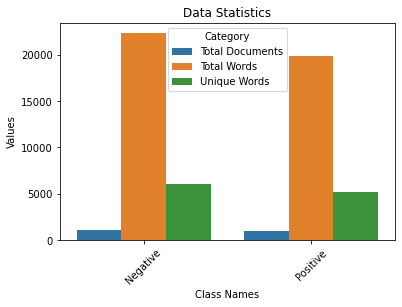

In [441]:
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);
plt.savefig('data_statistics.png',dpi = 600,bbox_inches = 'tight')

### Review Length Distribution

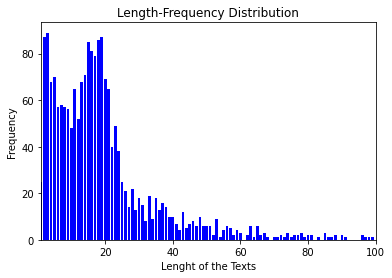

Maximum Length of a review: 523
Average Length of a reviews: 21.0


In [442]:
# Calculate the Review of each of the Review
data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 100)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.savefig('length_dist.png',dpi = 600,bbox_inches = 'tight')
plt.show()  
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")


### Save the cleaned data and stopwords into a pickle file

In [443]:
cleaned_data = pd.read_excel('clean_reviews.xlsx')
import pickle
# open a file, where you ant to store the data
file = open('D:\\CSE 497\\Bengali-Book-Reviews-master\\book_review_data.pkl', 'wb')

# dump information to that file
pickle.dump(cleaned_data, file)

In [444]:
data

,Review,Sentiment,cleaned,ReviewLength
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই টি সংগ্রহে আছে তা পড়েছি বই টি সম্পর্কে যদি ...,127
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফালতু বই শুধু শুধু টাকা নষ্ট,6
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একটু পড়ে দেখতে বলসিলো একটু পড়লাম তারপর হড়হড় বম...,35
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এটা বই ছিঃ ধিকার জানায় প্রশাসনের নজর দেয়া উচিৎ...,30
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,প্রিয় রকমারি কম দয়া বইটি আপনাদের ওয়েবসাইট সরিয়...,14
...,...,...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative,স্টার দেওয়াও বৃথা মানে ভিডিও বানাইয়া আজকে লেখক...,65
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative,তাদের কথা শুনলে মনে হয় তারা মনে হয় আশে পাশে তা...,68
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো,8
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative,বোগাস বই টাকা নষ্ট,4


In [445]:
#data = open('D:\\CSE 497\\Bengali-Book-Reviews-master\\book_review_data.pkl','rb')
#data = pickle.load(data)


In [446]:
data

,Review,Sentiment,cleaned,ReviewLength
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই টি সংগ্রহে আছে তা পড়েছি বই টি সম্পর্কে যদি ...,127
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফালতু বই শুধু শুধু টাকা নষ্ট,6
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একটু পড়ে দেখতে বলসিলো একটু পড়লাম তারপর হড়হড় বম...,35
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এটা বই ছিঃ ধিকার জানায় প্রশাসনের নজর দেয়া উচিৎ...,30
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,প্রিয় রকমারি কম দয়া বইটি আপনাদের ওয়েবসাইট সরিয়...,14
...,...,...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative,স্টার দেওয়াও বৃথা মানে ভিডিও বানাইয়া আজকে লেখক...,65
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative,তাদের কথা শুনলে মনে হয় তারা মনে হয় আশে পাশে তা...,68
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো,8
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative,বোগাস বই টাকা নষ্ট,4


In [451]:
stp = open(stopwords_list,'r', encoding='iso-8859-1').read().split()#encoding='utf-8').read().split()
# pickle stopwords
import pickle
# open a file, where you ant to store the data
file = open('D:\\CSE 497\\Bengali-Book-Reviews-master\\book_stopwords.pkl', 'wb')

# dump information to that file
pickle.dump(stp, file)

In [452]:
data

,Review,Sentiment,cleaned,ReviewLength
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই টি সংগ্রহে আছে তা পড়েছি বই টি সম্পর্কে যদি ...,127
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফালতু বই শুধু শুধু টাকা নষ্ট,6
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একটু পড়ে দেখতে বলসিলো একটু পড়লাম তারপর হড়হড় বম...,35
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এটা বই ছিঃ ধিকার জানায় প্রশাসনের নজর দেয়া উচিৎ...,30
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,প্রিয় রকমারি কম দয়া বইটি আপনাদের ওয়েবসাইট সরিয়...,14
...,...,...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative,স্টার দেওয়াও বৃথা মানে ভিডিও বানাইয়া আজকে লেখক...,65
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative,তাদের কথা শুনলে মনে হয় তারা মনে হয় আশে পাশে তা...,68
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো,8
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative,বোগাস বই টাকা নষ্ট,4


In [453]:
data1 = open('D:\\CSE 497\\Bengali-Book-Reviews-master\\book_stopwords.pkl','rb')
#data1 = pickle.load(data1)
data1 = pickle.load(data1)

#while True: #check for end of file
    #try:
       # data1.append(pickle.load(data1)) # append record from file to end of list
    #except EOFError:
     #   break
#data1.close()


In [454]:
data

,Review,Sentiment,cleaned,ReviewLength
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই টি সংগ্রহে আছে তা পড়েছি বই টি সম্পর্কে যদি ...,127
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফালতু বই শুধু শুধু টাকা নষ্ট,6
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একটু পড়ে দেখতে বলসিলো একটু পড়লাম তারপর হড়হড় বম...,35
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এটা বই ছিঃ ধিকার জানায় প্রশাসনের নজর দেয়া উচিৎ...,30
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,প্রিয় রকমারি কম দয়া বইটি আপনাদের ওয়েবসাইট সরিয়...,14
...,...,...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative,স্টার দেওয়াও বৃথা মানে ভিডিও বানাইয়া আজকে লেখক...,65
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative,তাদের কথা শুনলে মনে হয় তারা মনে হয় আশে পাশে তা...,68
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো,8
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative,বোগাস বই টাকা নষ্ট,4


## Feature Extraction Using TF-IDF

In [455]:
from utils import calc_unigram_tfidf,calc_bigram_tfidf,calc_trigram_tfidf,show_tfidf

In [456]:
print(data.dtypes)

Review          object
Sentiment       object
cleaned         object
ReviewLength     int64
dtype: object


In [457]:
data

,Review,Sentiment,cleaned,ReviewLength
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই টি সংগ্রহে আছে তা পড়েছি বই টি সম্পর্কে যদি ...,127
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফালতু বই শুধু শুধু টাকা নষ্ট,6
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একটু পড়ে দেখতে বলসিলো একটু পড়লাম তারপর হড়হড় বম...,35
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এটা বই ছিঃ ধিকার জানায় প্রশাসনের নজর দেয়া উচিৎ...,30
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,প্রিয় রকমারি কম দয়া বইটি আপনাদের ওয়েবসাইট সরিয়...,14
...,...,...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative,স্টার দেওয়াও বৃথা মানে ভিডিও বানাইয়া আজকে লেখক...,65
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative,তাদের কথা শুনলে মনে হয় তারা মনে হয় আশে পাশে তা...,68
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো,8
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative,বোগাস বই টাকা নষ্ট,4


del data['Unnamed: 0']

In [460]:
data.cleaned=data.cleaned.astype(str)

In [461]:
print(data.dtypes)

Review          object
Sentiment       object
cleaned         object
ReviewLength     int64
dtype: object


In [462]:
tweet= 'বইটা ফালতু'
cv,feature_vector = calc_unigram_tfidf(data.cleaned)  
print("Shape of TF-IDF Corpus =====>",feature_vector.shape,'\n')
show_tfidf(cv,tweet)
#first_vector = tfidf.transform([samp_review]).toarray()

Shape of TF-IDF Corpus =====> (2011, 9224) 

Sample Review:  বইটা ফালতু
          tfidf
ফালতু  0.818806
বইটা   0.574070


In [463]:
#help(calc_unigram_tfidf)

In [464]:
data

,Review,Sentiment,cleaned,ReviewLength
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,Negative,বই টি সংগ্রহে আছে তা পড়েছি বই টি সম্পর্কে যদি ...,127
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,Negative,ফালতু বই শুধু শুধু টাকা নষ্ট,6
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",Negative,একটু পড়ে দেখতে বলসিলো একটু পড়লাম তারপর হড়হড় বম...,35
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,Negative,এটা বই ছিঃ ধিকার জানায় প্রশাসনের নজর দেয়া উচিৎ...,30
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",Negative,প্রিয় রকমারি কম দয়া বইটি আপনাদের ওয়েবসাইট সরিয়...,14
...,...,...,...,...
2006,1 স্টার দেওয়াও বৃথা। মানে ভিডিও বানাইয়া আজকে ...,Negative,স্টার দেওয়াও বৃথা মানে ভিডিও বানাইয়া আজকে লেখক...,65
2007,তাদের কথা শুনলে মনে হয় তারা এই মনে হয় আশে পাশে...,Negative,তাদের কথা শুনলে মনে হয় তারা মনে হয় আশে পাশে তা...,68
2008,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো। ...,Negative,এইরকম বই পড়ার চাইতে মুড়ি কিন্না খাওয়াও ভালো,8
2009,বোগাস বই। টাকা নষ্ট।\n ...,Negative,বোগাস বই টাকা নষ্ট,4


## ML Model Development Using Unigram Feature

### Unigram Tf-idf Feature Extraction, Label Encoding and Splitting

In [465]:
from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 9224

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2011 
	Training		 1608 
	Test			 403


### Model Defination

In [466]:
from utils import model_performace,ml_models_for_unigram_tfidf

## classifiers defination
ml_models,model_names = ml_models_for_unigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_unigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table  

In [467]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_unigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,90.82,94.38,86.15,90.08
DT,81.64,81.03,81.03,81.03
RF,89.83,93.26,85.13,89.01
MNB,94.04,91.30,96.92,94.03
KNN,59.55,100.00,16.41,28.19
Linear SVM,90.32,95.88,83.59,89.32
RBF SVM,90.82,94.38,86.15,90.08
SGD,92.56,94.59,89.74,92.11


In [468]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by MNB at = 94.04
Highest F1-Score achieved by MNB at = 94.03
Highest Precision Score achieved by KNN at = 100.0
Highest Recall Score achieved by MNB at = 96.92


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


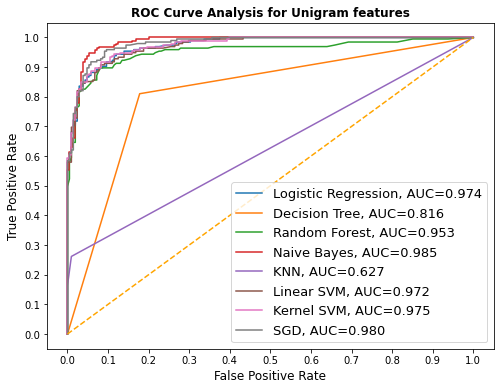

In [469]:
from utils import plot_roc_curve,ml_models_for_unigram_tfidf
## classifiers defination
gram_models = ml_models_for_unigram_tfidf() 

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

### Precision-Recall Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


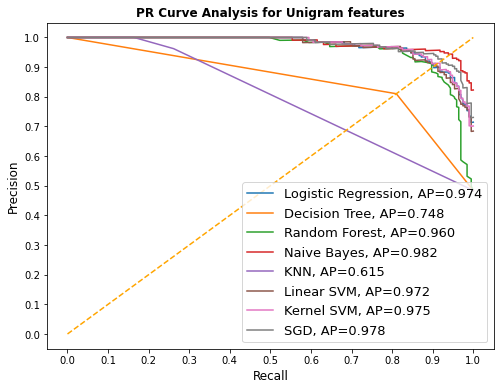

In [470]:
from utils import plot_PR_curve,ml_models_for_unigram_tfidf

gram_models = ml_models_for_unigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

## Model Development Using Bigram Feature

### Bi-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [471]:
from utils import label_encoding,dataset_split
from utils import calc_bigram_tfidf

# calculate the Bigram Tf-idf feature
cv,feature_vector = calc_bigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 40845

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2011 
	Training		 1608 
	Test			 403


### Model Defination

In [472]:
from utils import model_performace,ml_models_for_bigram_tfidf
                
# Classifiers Defination
ml_models,model_names = ml_models_for_bigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_bigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table

In [473]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_bigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,89.33,94.19,83.08,88.28
DT,80.89,80.10,80.51,80.31
RF,88.83,93.60,82.56,87.74
MNB,92.80,89.52,96.41,92.84
KNN,54.59,100.00,6.15,11.59
Linear SVM,88.59,96.27,79.49,87.08
RBF SVM,88.59,96.27,79.49,87.08
SGD,90.82,93.89,86.67,90.13


In [474]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by MNB at = 92.80000000000001
Highest F1-Score achieved by MNB at = 92.84
Highest Precision Score achieved by KNN at = 100.0
Highest Recall Score achieved by MNB at = 96.41


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


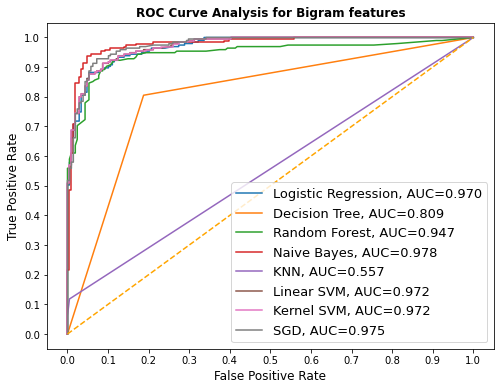

In [475]:
from utils import plot_roc_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Precision-Recall Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


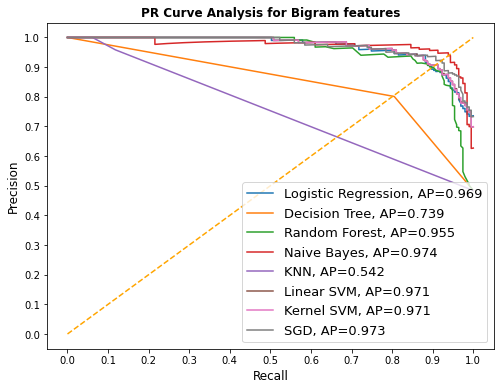

In [476]:
from utils import plot_PR_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Model Development Using Tri-gram Feature

### Tri-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [477]:
from utils import label_encoding,dataset_split
from utils import calc_trigram_tfidf

# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_trigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 77325

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2011 
	Training		 1608 
	Test			 403


### Model Defination

In [478]:
from utils import model_performace,ml_models_for_trigram_tfidf
            

# Classifiers Defination
ml_models,model_names = ml_models_for_trigram_tfidf()             

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_trigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table

In [479]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_trigram.json'))
table = performance_table(accuracy)
table


,Accuracy,Precision,Recall,F1 Score
LR,88.34,94.05,81.03,87.05
DT,79.40,78.28,79.49,78.88
RF,88.83,93.10,83.08,87.80
MNB,91.32,87.04,96.41,91.48
KNN,54.09,100.00,5.13,9.76
Linear SVM,85.36,95.95,72.82,82.80
RBF SVM,87.34,95.00,77.95,85.63
SGD,90.32,94.32,85.13,89.49


In [480]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by MNB at = 91.32000000000001
Highest F1-Score achieved by MNB at = 91.47999999999999
Highest Precision Score achieved by KNN at = 100.0
Highest Recall Score achieved by MNB at = 96.41


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


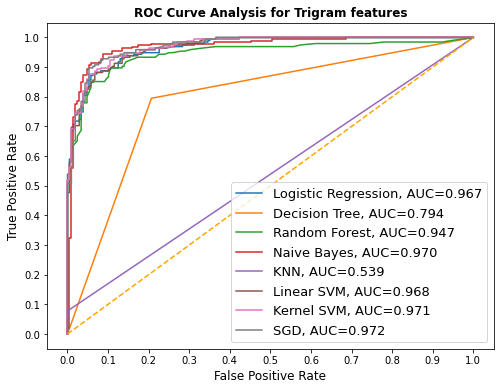

In [481]:
from utils import plot_roc_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

### Precision-Recall

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


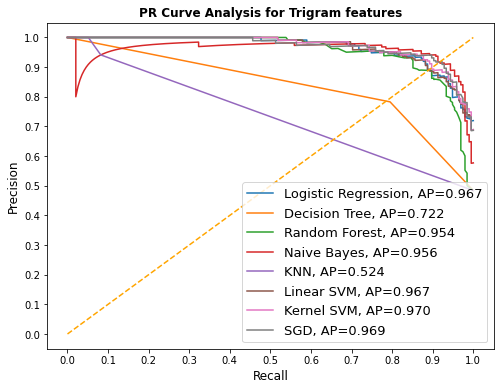

In [482]:
from utils import plot_PR_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

## Final Model

- Selected Feature: Unigram
- Selected Model : Multinomial Naive Bayes

In [483]:
from sklearn.naive_bayes import MultinomialNB

from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

Feature Size :======> 9224

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2011 
	Training		 1608 
	Test			 403


In [484]:
from sklearn.metrics import accuracy_score
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train,y_train) 
y_pred = mnb_model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)*100

94.04466501240695

### Saved the model for reuse again

In [487]:
import pickle
# open a file, where you ant to store the data
file = open('book_review_mnb.pkl', 'wb')

# dump information to that file
pickle.dump(mnb_model, file)

In [488]:
model = open('book_review_mnb.pkl','rb')
nb = pickle.load(model)

In [489]:
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9404466501240695

## Check a Review Sentiment using our model

In [490]:
# load the model
model = open('book_review_mnb.pkl','rb')
nb = pickle.load(model)
######
review = 'aaaasd asd asdasd asd'
# Process the reviews
processed_review = process_reviews(review,stopwords = stopwords_list,removing_stopwords = True)

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
feature = cv.transform([processed_review]).toarray()

sentiment = nb.predict(feature)

if (sentiment ==0):
    print(f"It is a Negative Review ")
else:
    print(f"It is a Positive Review ")


It is a Negative Review 


In [491]:
sentiment = nb.predict_proba(feature)
round(max(sentiment.reshape(-1)),2)*100

51.0

In [492]:
review = 'aaaasd asd asdasd asd'
# Process the reviews
processed_review = process_reviews(review,stopwords = stopwords_list,removing_stopwords = True)
processed_review

''